In [1]:
from pyueye import ueye
import matplotlib.pyplot as plt
import numpy as np

# uEye

In [2]:
#Variables
hCam = ueye.HIDS(0)             #0: first available camera;  1-254: The camera with the specified camera ID
sInfo = ueye.SENSORINFO()
cInfo = ueye.CAMINFO()
pcImageMemory = ueye.c_mem_p()
MemID = ueye.int()
rectAOI = ueye.IS_RECT()
pitch = ueye.INT()
nBitsPerPixel = ueye.INT(24)    #24: bits per pixel for color mode; take 8 bits per pixel for monochrome
channels = 3                    #3: channels for color mode(RGB); take 1 channel for monochrome
m_nColorMode = ueye.INT()		# Y8/RGB16/RGB24/REG32
bytes_per_pixel = int(nBitsPerPixel / 8)

In [3]:
print("sInfo",sInfo)
print("cInfo",cInfo)
print("pcImageMemory",pcImageMemory)
print("MemID",MemID)
print("rectAOI",rectAOI)
print("pitch",pitch)
print("nBitsPerPixel",nBitsPerPixel)
print("m_nColorMode",m_nColorMode)
print("bytes_per_pixel",bytes_per_pixel)

sInfo struct SENSORINFO {
    SensorID [c_ushort] = 0;
    strSensorName [c_char_Array_32] = b'';
    nColorMode [c_char] = b'\x00';
    nMaxWidth [c_uint] = 0;
    nMaxHeight [c_uint] = 0;
    bMasterGain [c_int] = 0;
    bRGain [c_int] = 0;
    bGGain [c_int] = 0;
    bBGain [c_int] = 0;
    bGlobShutter [c_int] = 0;
    wPixelSize [c_ushort] = 0;
    nUpperLeftBayerPixel [c_char] = b'\x00';
    Reserved [c_char_Array_13] = b'';
};
cInfo struct BOARDINFO {
    SerNo [c_char_Array_12] = b'';
    ID [c_char_Array_20] = b'';
    Version [c_char_Array_10] = b'';
    Date [c_char_Array_12] = b'';
    Select [c_ubyte] = 0;
    Type [c_ubyte] = 0;
    Reserved [c_char_Array_8] = b'';
};
pcImageMemory <c_mem_p object at 0x000001EE7FE351C0>
MemID 0
rectAOI struct IS_RECT {
    s32X [c_int] = 0;
    s32Y [c_int] = 0;
    s32Width [c_int] = 0;
    s32Height [c_int] = 0;
};
pitch 0
nBitsPerPixel 24
m_nColorMode 0
bytes_per_pixel 3


In [4]:
# Starts the driver and establishes the connection to the camera
nRet = ueye.is_InitCamera(hCam, None)
if nRet != ueye.IS_SUCCESS:
    print("is_InitCamera ERROR")

In [5]:
# Reads out the data hard-coded in the non-volatile camera memory and writes it to the data structure that cInfo points to
nRet = ueye.is_GetCameraInfo(hCam, cInfo)
if nRet != ueye.IS_SUCCESS:
    print("is_GetCameraInfo ERROR")
else:
    print(cInfo)

struct BOARDINFO {
    SerNo [c_char_Array_12] = b'4002918497';
    ID [c_char_Array_20] = b'IDS GmbH';
    Version [c_char_Array_10] = b'V1.0';
    Date [c_char_Array_12] = b'06.11.2012';
    Select [c_ubyte] = 2;
    Type [c_ubyte] = 66;
    Reserved [c_char_Array_8] = b'';
};


In [6]:
# You can query additional information about the sensor type used in the camera
nRet = ueye.is_GetSensorInfo(hCam, sInfo)
if nRet != ueye.IS_SUCCESS:
    print("is_GetSensorInfo ERROR")
else:
    print(sInfo)    

struct SENSORINFO {
    SensorID [c_ushort] = 37;
    strSensorName [c_char_Array_32] = b'UI164xLE-C';
    nColorMode [c_char] = b'\x02';
    nMaxWidth [c_uint] = 1280;
    nMaxHeight [c_uint] = 1024;
    bMasterGain [c_int] = 1;
    bRGain [c_int] = 1;
    bGGain [c_int] = 1;
    bBGain [c_int] = 1;
    bGlobShutter [c_int] = 0;
    wPixelSize [c_ushort] = 360;
    nUpperLeftBayerPixel [c_char] = b'\x00';
    Reserved [c_char_Array_13] = b'';
};


In [7]:
nRet = ueye.is_ResetToDefault( hCam)
if nRet != ueye.IS_SUCCESS:
    print("is_ResetToDefault ERROR")

In [8]:
# Set display mode to DIB
nRet = ueye.is_SetDisplayMode(hCam, ueye.IS_SET_DM_DIB)

In [9]:
# Set the right color mode
print(int.from_bytes(sInfo.nColorMode.value, byteorder='big'), [ueye.IS_COLORMODE_BAYER, ueye.IS_COLORMODE_CBYCRY, ueye.IS_COLORMODE_MONOCHROME])
if int.from_bytes(sInfo.nColorMode.value, byteorder='big') == ueye.IS_COLORMODE_BAYER:
    # setup the color depth to the current windows setting
    ueye.is_GetColorDepth(hCam, nBitsPerPixel, m_nColorMode)
    bytes_per_pixel = int(nBitsPerPixel / 8)
    print("IS_COLORMODE_BAYER: ", )
    print("\tm_nColorMode: \t\t", m_nColorMode)
    print("\tnBitsPerPixel: \t\t", nBitsPerPixel)
    print("\tbytes_per_pixel: \t\t", bytes_per_pixel)
    print()

elif int.from_bytes(sInfo.nColorMode.value, byteorder='big') == ueye.IS_COLORMODE_CBYCRY:
    # for color camera models use RGB32 mode
    m_nColorMode = ueye.IS_CM_BGRA8_PACKED
    nBitsPerPixel = ueye.INT(32)
    bytes_per_pixel = int(nBitsPerPixel / 8)
    print("IS_COLORMODE_CBYCRY: ", )
    print("\tm_nColorMode: \t\t", m_nColorMode)
    print("\tnBitsPerPixel: \t\t", nBitsPerPixel)
    print("\tbytes_per_pixel: \t\t", bytes_per_pixel)
    print()

elif int.from_bytes(sInfo.nColorMode.value, byteorder='big') == ueye.IS_COLORMODE_MONOCHROME:
    # for color camera models use RGB32 mode
    m_nColorMode = ueye.IS_CM_MONO8
    nBitsPerPixel = ueye.INT(8)
    bytes_per_pixel = int(nBitsPerPixel / 8)
    print("IS_COLORMODE_MONOCHROME: ", )
    print("\tm_nColorMode: \t\t", m_nColorMode)
    print("\tnBitsPerPixel: \t\t", nBitsPerPixel)
    print("\tbytes_per_pixel: \t\t", bytes_per_pixel)
    print()

else:
    # for monochrome camera models use Y8 mode
    m_nColorMode = ueye.IS_CM_MONO8
    nBitsPerPixel = ueye.INT(8)
    bytes_per_pixel = int(nBitsPerPixel / 8)
    print("else")

2 [2, 4, 1]
IS_COLORMODE_BAYER: 
	m_nColorMode: 		 0
	nBitsPerPixel: 		 32
	bytes_per_pixel: 		 4



In [10]:
# Can be used to set the size and position of an "area of interest"(AOI) within an image
nRet = ueye.is_AOI(hCam, ueye.IS_AOI_IMAGE_GET_AOI, rectAOI, ueye.sizeof(rectAOI))
if nRet != ueye.IS_SUCCESS:
    print("is_AOI ERROR")

width = rectAOI.s32Width
height = rectAOI.s32Height
print(rectAOI)

struct IS_RECT {
    s32X [c_int] = 0;
    s32Y [c_int] = 0;
    s32Width [c_int] = 1280;
    s32Height [c_int] = 1024;
};


In [11]:
# Prints out some information about the camera and the sensor
print("Camera model:\t\t", sInfo.strSensorName.decode('utf-8'))
print("Camera serial no.:\t", cInfo.SerNo.decode('utf-8'))
print("Maximum image width:\t", width)
print("Maximum image height:\t", height)
print()

Camera model:		 UI164xLE-C
Camera serial no.:	 4002918497
Maximum image width:	 1280
Maximum image height:	 1024



In [12]:
# Allocates an image memory for an image having its dimensions defined by width and height and its color depth defined by nBitsPerPixel
nRet = ueye.is_AllocImageMem(hCam, width, height, nBitsPerPixel, pcImageMemory, MemID)
if nRet != ueye.IS_SUCCESS:
    print("is_AllocImageMem ERROR")
else:
    # Makes the specified image memory the active memory
    nRet = ueye.is_SetImageMem(hCam, pcImageMemory, MemID)
    if nRet != ueye.IS_SUCCESS:
        print("is_SetImageMem ERROR")
    else:
        # Set the desired color mode
        nRet = ueye.is_SetColorMode(hCam, m_nColorMode)

In [13]:
# Activates the camera's live video mode (free run mode)
nRet = ueye.is_CaptureVideo(hCam, ueye.IS_DONT_WAIT)
if nRet != ueye.IS_SUCCESS:
    print("is_CaptureVideo ERROR")

In [14]:
# Enables the queue mode for existing image memory sequences
nRet = ueye.is_InquireImageMem(hCam, pcImageMemory, MemID, width, height, nBitsPerPixel, pitch)
if nRet != ueye.IS_SUCCESS:
    print("is_InquireImageMem ERROR")
else:
    print("Press q to leave the programm")

Press q to leave the programm


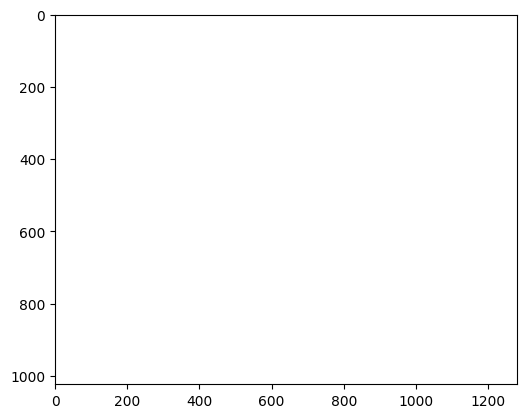

In [16]:
# In order to display the image in an OpenCV window we need to...
# ...extract the data of our image memory
array = ueye.get_data(pcImageMemory, width, height, nBitsPerPixel, pitch, copy=False)

# bytes_per_pixel = int(nBitsPerPixel / 8)

# ...reshape it in an numpy array...
frame = np.reshape(array,(height.value, width.value, bytes_per_pixel))

plt.imshow(frame)


In [17]:
# Releases an image memory that was allocated using is_AllocImageMem() and removes it from the driver management
ueye.is_FreeImageMem(hCam, pcImageMemory, MemID)

# Disables the hCam camera handle and releases the data structures and memory areas taken up by the uEye camera
ueye.is_ExitCamera(hCam)

0

# Clase

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from py_lab.drivers.cameras.uEye.uEye import uEye
import matplotlib.pyplot as plt

In [3]:
cam = uEye()

In [4]:
cam.open()

In [5]:
cam.start_live()

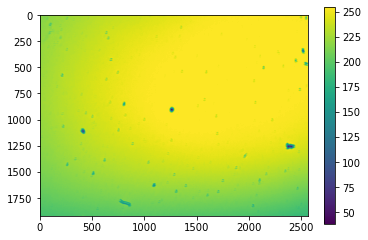

In [20]:
image = cam.get_image()
plt.imshow(image)
plt.colorbar()

In [41]:
cam.set_aoi(width=2560, height=1920, x=0, y=0)

In [21]:
cam.get_fps()

0.7335644697168815

In [6]:
cam.set_fps(0.1)

Framerate 0.1 lower than minimum (0.36). Value changed to minimum


0.36394280877191393

In [28]:
cam.get_pixelclock()

39

In [25]:
cam.set_pixelclock(43)

43

In [15]:
cam.get_exposure()

283.6053546524562

In [30]:
cam.set_exposure(1e5)

Exposure 100000.0 higher than maximum (1590)


1361.3056276617901

In [28]:
cam.set_exposure_auto(0)

In [31]:
cam.set_gain_auto(0)

In [ ]:
cam.close()

In [32]:
1596*5

7980

In [33]:
283*24

6792

In [34]:
158*43

6794

In [35]:
5/.36

13.88888888888889

In [36]:
24/1.75

13.714285714285714

In [37]:
43/3.31

12.990936555891238

In [24]:
1000/6.31

158.4786053882726

In [25]:
5/.73

6.8493150684931505

In [26]:
24/3.52

6.818181818181818

In [27]:
42/6.31

6.6561014263074485

In [ ]:
#!/usr/bin/env python

#------------------------------------------------------------------------------
#                 PyuEye example - camera modul
#
# Copyright (c) 2017 by IDS Imaging Development Systems GmbH.
# All rights reserved.
#
# Redistribution and use in source and binary forms, with or without
# modification, are permitted provided that the following conditions are met:
# 1. Redistributions of source code must retain the above copyright notice,
#    this list of conditions and the following disclaimer.
# 2. Redistributions in binary form must reproduce the above copyright notice,
#    this list of conditions and the following disclaimer in the documentation
#    and/or other materials provided with the distribution.
# 3. Neither the name of the copyright holder nor the names of its contributors
#    may be used to endorse or promote products derived from this software
#    without specific prior written permission.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
# AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
# IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE
# ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE
# LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR
# CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF
# SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS
# INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN
# CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE)
# ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE
# POSSIBILITY OF SUCH DAMAGE.
#------------------------------------------------------------------------------

from pyueye import ueye
from pyueye_example_utils import (uEyeException, Rect, get_bits_per_pixel,
								  ImageBuffer, check)

class Camera:
	def __init__(self, device_id=0):
		self.h_cam = ueye.HIDS(device_id)
		self.img_buffers = []

	def __enter__(self):
		self.init()
		return self

	def __exit__(self, _type, value, traceback):
		self.exit()

	def handle(self):
		return self.h_cam

	def alloc(self, buffer_count=3):
		rect = self.get_aoi()
		bpp = get_bits_per_pixel(self.get_colormode())

		for buff in self.img_buffers:
			check(ueye.is_FreeImageMem(self.h_cam, buff.mem_ptr, buff.mem_id))

		for i in range(buffer_count):
			buff = ImageBuffer()
			ueye.is_AllocImageMem(self.h_cam,
								  rect.width, rect.height, bpp,
								  buff.mem_ptr, buff.mem_id)
			
			check(ueye.is_AddToSequence(self.h_cam, buff.mem_ptr, buff.mem_id))

			self.img_buffers.append(buff)
		#
		ueye.is_InitImageQueue(self.h_cam, 0)
		return

	def init(self):
		ret = ueye.is_InitCamera(self.h_cam, None)
		if ret != ueye.IS_SUCCESS:
			self.h_cam = None
			raise uEyeException(ret)
		#
		return ret

	def exit(self):
		ret = None
		if self.h_cam is not None:
			ret = ueye.is_ExitCamera(self.h_cam)
		if ret == ueye.IS_SUCCESS:
			self.h_cam = None
		return

	def get_aoi(self):
		rect_aoi = ueye.IS_RECT()
		ueye.is_AOI(self.h_cam, ueye.IS_AOI_IMAGE_GET_AOI, rect_aoi, ueye.sizeof(rect_aoi))

		return Rect(rect_aoi.s32X.value,
					rect_aoi.s32Y.value,
					rect_aoi.s32Width.value,
					rect_aoi.s32Height.value)

	def set_aoi(self, x, y, width, height):
		rect_aoi = ueye.IS_RECT()
		rect_aoi.s32X = ueye.int(x)
		rect_aoi.s32Y = ueye.int(y)
		rect_aoi.s32Width = ueye.int(width)
		rect_aoi.s32Height = ueye.int(height)

		return ueye.is_AOI(self.h_cam, ueye.IS_AOI_IMAGE_SET_AOI, rect_aoi, ueye.sizeof(rect_aoi))

	def capture_video(self, wait=False):
		wait_param = ueye.IS_WAIT if wait else ueye.IS_DONT_WAIT  
		# over er pythons variant av ternary operator "?:" i C
		# se Python 3.6 documentation, kap. 6.12. Conditional expressions:
		# https://docs.python.org/3.6/reference/expressions.html#grammar-token-or_test 
		return ueye.is_CaptureVideo(self.h_cam, wait_param)

	def stop_video(self):
		return ueye.is_StopLiveVideo(self.h_cam, ueye.IS_FORCE_VIDEO_STOP)
	
	def freeze_video(self, wait=False):
		wait_param = ueye.IS_WAIT if wait else ueye.IS_DONT_WAIT
		return ueye.is_FreezeVideo(self.h_cam, wait_param)

	def set_colormode(self, colormode):
		check(ueye.is_SetColorMode(self.h_cam, colormode))
		
	def get_colormode(self):
		ret = ueye.is_SetColorMode(self.h_cam, ueye.IS_GET_COLOR_MODE)
		return ret

	def get_format_list(self):
		count = ueye.UINT()
		check(ueye.is_ImageFormat(self.h_cam, ueye.IMGFRMT_CMD_GET_NUM_ENTRIES, count, ueye.sizeof(count)))
		format_list = ueye.IMAGE_FORMAT_LIST(ueye.IMAGE_FORMAT_INFO * count.value)
		format_list.nSizeOfListEntry = ueye.sizeof(ueye.IMAGE_FORMAT_INFO)
		format_list.nNumListElements = count.value
		check(ueye.is_ImageFormat(self.h_cam, ueye.IMGFRMT_CMD_GET_LIST,
								  format_list, ueye.sizeof(format_list)))
		return format_list